# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MEMBACA DATASET

In [2]:
data = pd.read_csv('sales.csv')
data

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


# Memilih data dari dataset untuk digunakan sebagai atribut

In [3]:
data = data[["W0","Normalized0"]] #W0= X1; Normalized42= X2
data.head(10)

,W0,Normalized0
0,11,0.44
1,7,0.70
2,7,0.36
3,12,0.59
4,8,0.33
5,3,0.27
6,4,0.40
7,8,0.42
8,14,0.73
9,22,0.54


# Melihat ringkasan statistik

In [4]:
data.describe()

,W0,Normalized0
count,811.000000,811.000000
mean,8.902589,0.289396
std,12.067163,0.266307
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,0.250000
75%,12.000000,0.500000
max,54.000000,1.000000


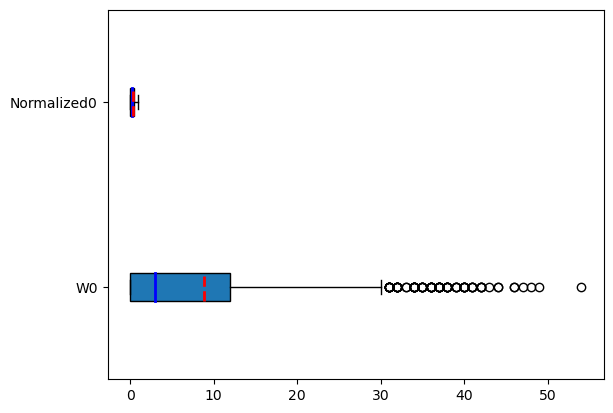

In [5]:
fig, ax = plt.subplots()
ax.boxplot(data,
          vert = False,
          showmeans = True,
          meanline = True,
          labels = ("W0","Normalized0"),
          patch_artist = True,
          medianprops = {"linewidth" : 2, "color" : "blue"},
          meanprops = {"linewidth" : 2, "color" : "red"})

plt.show()

# Buang Outlier

<function matplotlib.pyplot.show(close=None, block=None)>

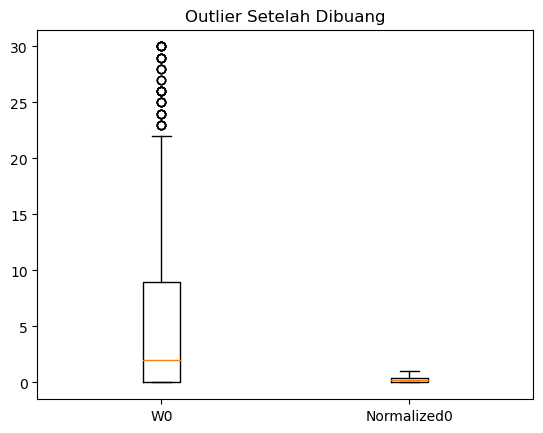

In [6]:
#Q1, Q2, dan Q3
kolom = ["W0", "Normalized0"]

Q1 = data[kolom].quantile(0.25)
Q3 = data[kolom].quantile(0.75)
IQR = Q3-Q1
data = data[~((data[kolom]<(Q1 - 1.5 * IQR)) |
             (data[kolom]>(Q3 + 1.5 * IQR))).any(axis = 1)]

plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Outlier Setelah Dibuang")
plt.show

In [7]:
data.describe()

,W0,Normalized0
count,726.000000,726.000000
mean,5.601928,0.257273
std,7.485707,0.257986
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.220000
75%,9.000000,0.430000
max,30.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 726 entries, 0 to 810
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   W0           726 non-null    int64  
 1   Normalized0  726 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 17.0 KB


# Membuat Nilai X

In [9]:
x_array = np.array(data)

# Visualisasi Persebaran Data

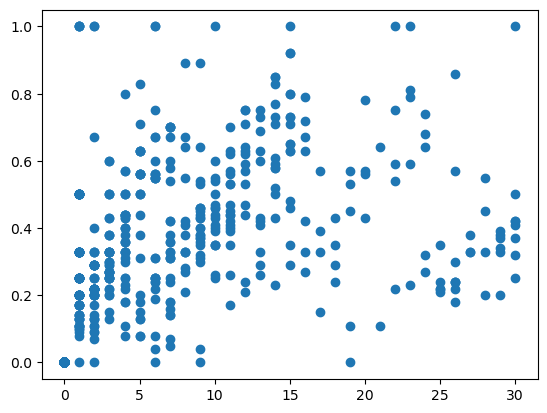

In [10]:
plt.scatter(data.W0, data.Normalized0)
plt.show()

# Standarisasi

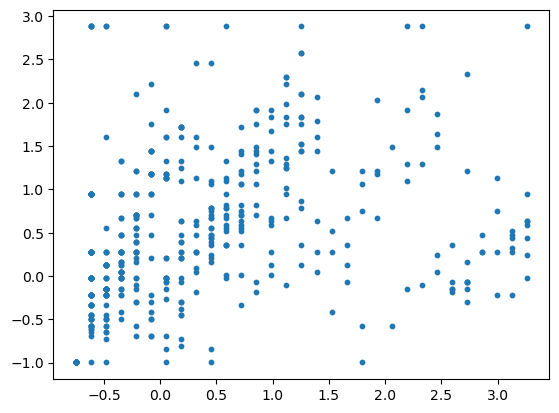

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
plt.show()

# #Standarisasi

In [13]:
!pip install scikit-learn

<function matplotlib.pyplot.show(close=None, block=None)>

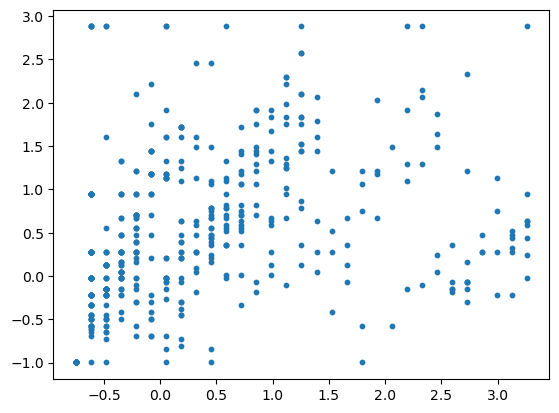

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
plt.show

# CEK SUM OF SQUARE ERROR DARI TIAP PEMBAGIAN JUMLAH CLUSTER

In [16]:
from sklearn.cluster import KMeans
sse = []
index = range(1,10)
for i in index :
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init='auto')
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print (i,sse_)

1 1452.0000000000018
2 601.9926162924148
3 366.550199683458
4 248.82979566091825
5 199.27330172204682
6 150.30635837284206
7 138.05005389821903
8 106.8692051377795
9 96.28612144558053


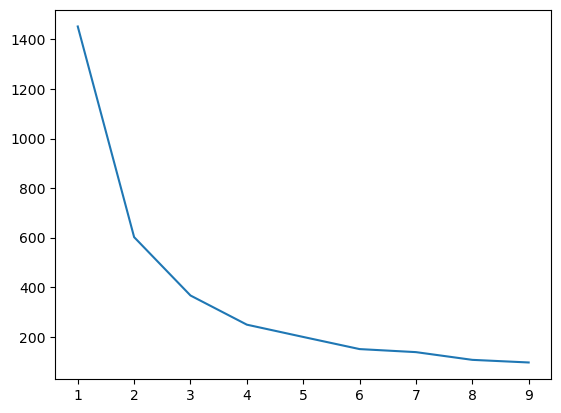

In [17]:
plt.plot(index, sse)
plt.show()

# Membuat Model

In [19]:
kmeans = KMeans (n_clusters = 3, random_state = 0, n_init = 'auto')
kmeans.fit(x_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

# Melihat Cluster Pusat

In [20]:
kmeans.cluster_centers_

array([[-0.60197515, -0.67848693],
       [ 2.41675127,  0.63658134],
       [ 0.35735087,  1.0590528 ]])

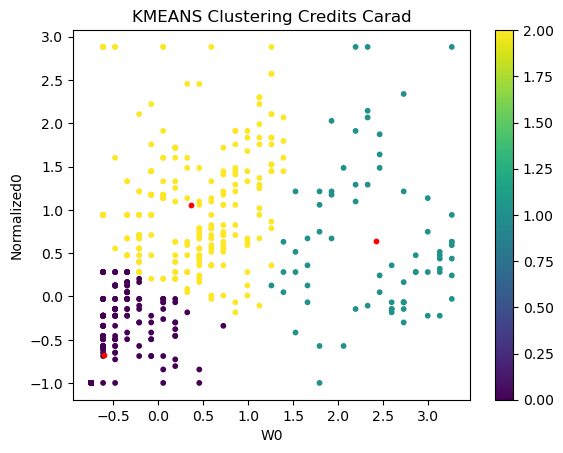

In [24]:
output = plt.scatter(x_scaled[:,0],x_scaled[:,1], s=10, c = kmeans.labels_) #datanya
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c ="red", s=10) #centroid
plt.title("KMEANS Clustering Credits Carad")
plt.xlabel("W0")
plt.ylabel("Normalized0")
plt.colorbar(output)
plt.show()

# Evaluasi Model

In [25]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.7639606214754565